In [28]:
import scanpy as sc
import episcanpy.api as epi
import numpy as np
import anndata as ad
import random
import copy
import pandas as pd

sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

In [29]:
adata10x = ad.read('./integration_resubmission/gene_activity_10x_small_150k_transcripts.h5ad')
adata10x.var_names_make_unique()
adata10x

AnnData object with n_obs × n_vars = 3619 × 4029 
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [30]:
sc.pp.filter_cells(adata10x, min_genes=100)
adata10x

AnnData object with n_obs × n_vars = 3619 × 4029 
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features', 'n_genes'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [58]:
adatafang = ad.read('./integration_resubmission/gene_activity_fang_small_150k_transcripts.h5ad')
adatafang.var_names_make_unique()
adatafang

AnnData object with n_obs × n_vars = 4000 × 3940 
    obs: 'nb_features', 'log_nb_features', 'filter'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [59]:
sc.pp.filter_cells(adatafang, min_genes=100)
adatafang

AnnData object with n_obs × n_vars = 3723 × 3940 
    obs: 'nb_features', 'log_nb_features', 'filter', 'n_genes'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [33]:
adatacus = ad.read('./integration_resubmission/gene_activity_cus_small_150k_transcript.h5ad')
adatacus.var_names_make_unique()
adatacus

AnnData object with n_obs × n_vars = 4000 × 4196 
    obs: 'nb_features', 'filter'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

In [34]:
sc.pp.filter_cells(adatacus, min_genes=100)
adatacus

AnnData object with n_obs × n_vars = 3902 × 4196 
    obs: 'nb_features', 'filter', 'n_genes'
    var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id'

### Merging datasets

In [35]:
adatamerged = adata10x.concatenate(adatafang)

batchname=copy.copy(adatamerged.obs['batch'])
batchname

batchname = batchname.map({ '1' : 'Fang et al.', '0' : '10x Genomics' })
batchname

adatamerged.obs['batchname'] = batchname
adatamerged

AnnData object with n_obs × n_vars = 7342 × 3629 
    obs: 'batch', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'n_genes', 'nb_features', 'batchname'
    var: 'gene_id-0', 'transcript_id', 'gene_type', 'gene_name-0', 'transcript_type', 'transcript_name', 'protein_id-0', 'gene_id-1', 'gene_name-1', 'protein_id-1'

... storing 'filter' as categorical
... storing 'filter_barcode_cellranger' as categorical


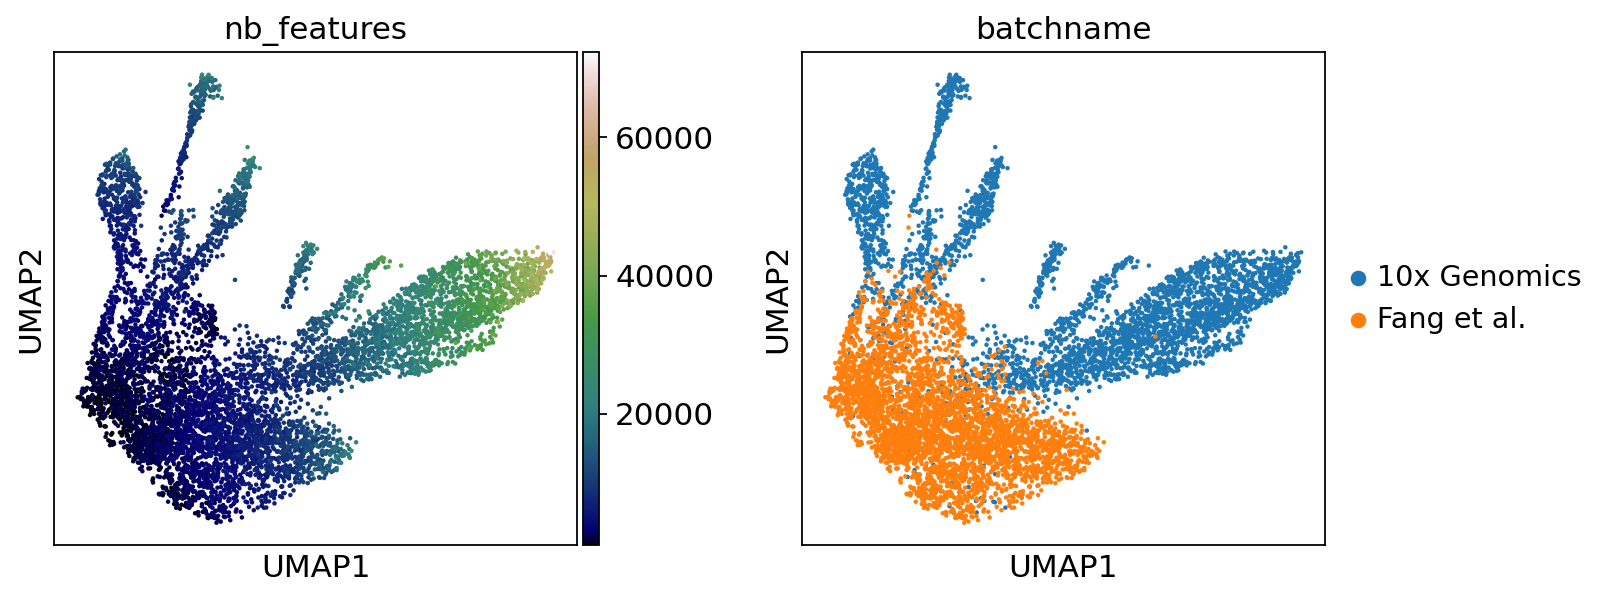

In [36]:
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)

In [37]:
adatamerged = adatamerged.concatenate(adatacus)
adatamerged.obs['batchname'] = adatamerged.obs['batchname'].replace(np.nan, 'Cusanovich et al.', regex=False)
adatamerged

AnnData object with n_obs × n_vars = 11244 × 3422 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'n_genes', 'nb_features'
    var: 'gene_id-0-0', 'transcript_id', 'gene_type-0', 'gene_name-0-0', 'transcript_type', 'transcript_name', 'protein_id-0-0', 'gene_id-1-0', 'gene_name-1-0', 'protein_id-1-0', 'gene_id-1', 'gene_type-1', 'gene_name-1', 'protein_id-1'

... storing 'batchname' as categorical
... storing 'filter' as categorical
... storing 'filter_barcode_cellranger' as categorical


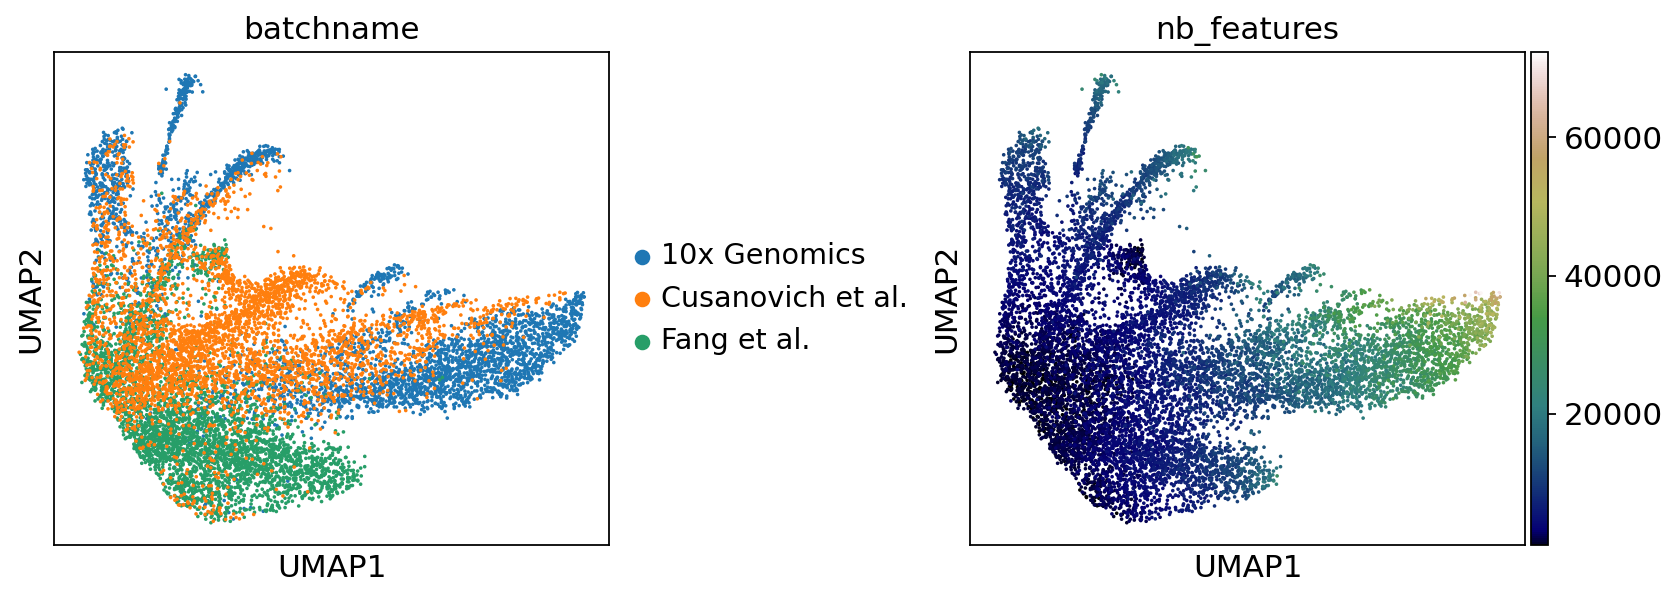

In [38]:
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

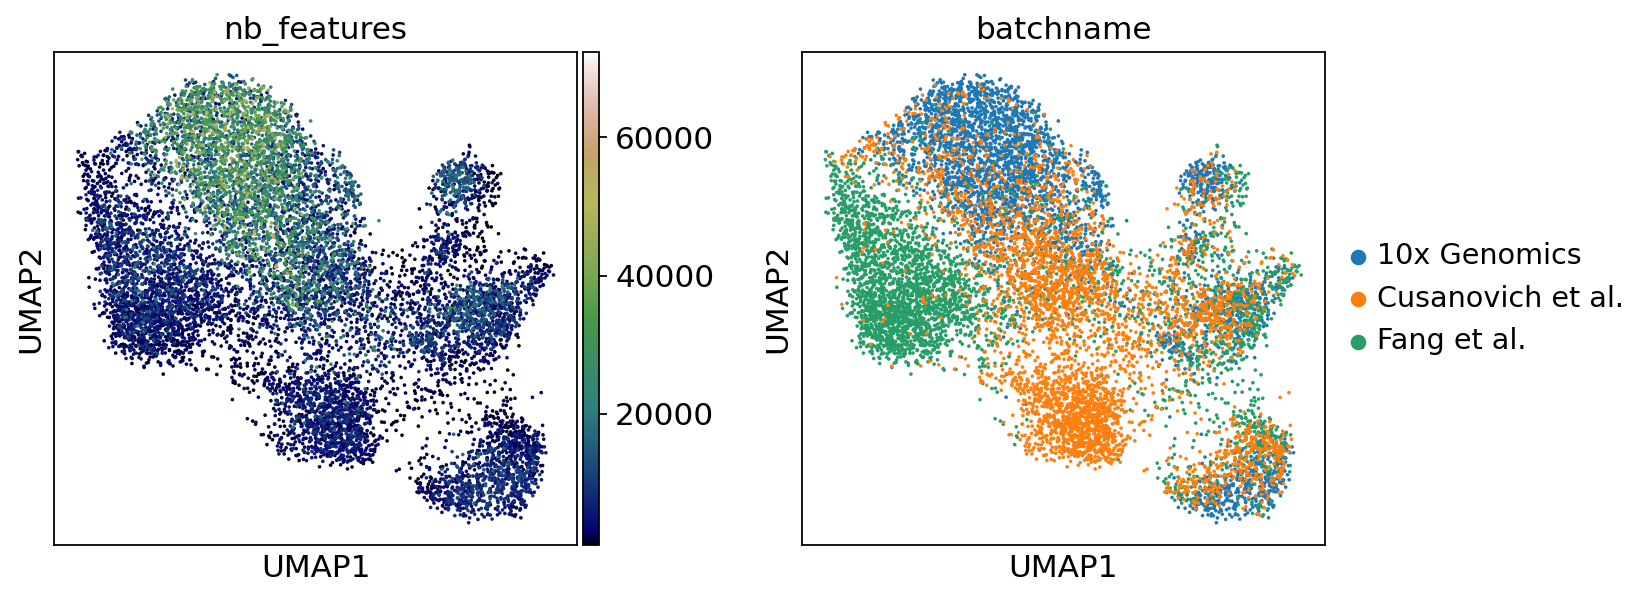

In [39]:
epi.pp.normalize_per_cell(adatamerged)
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)

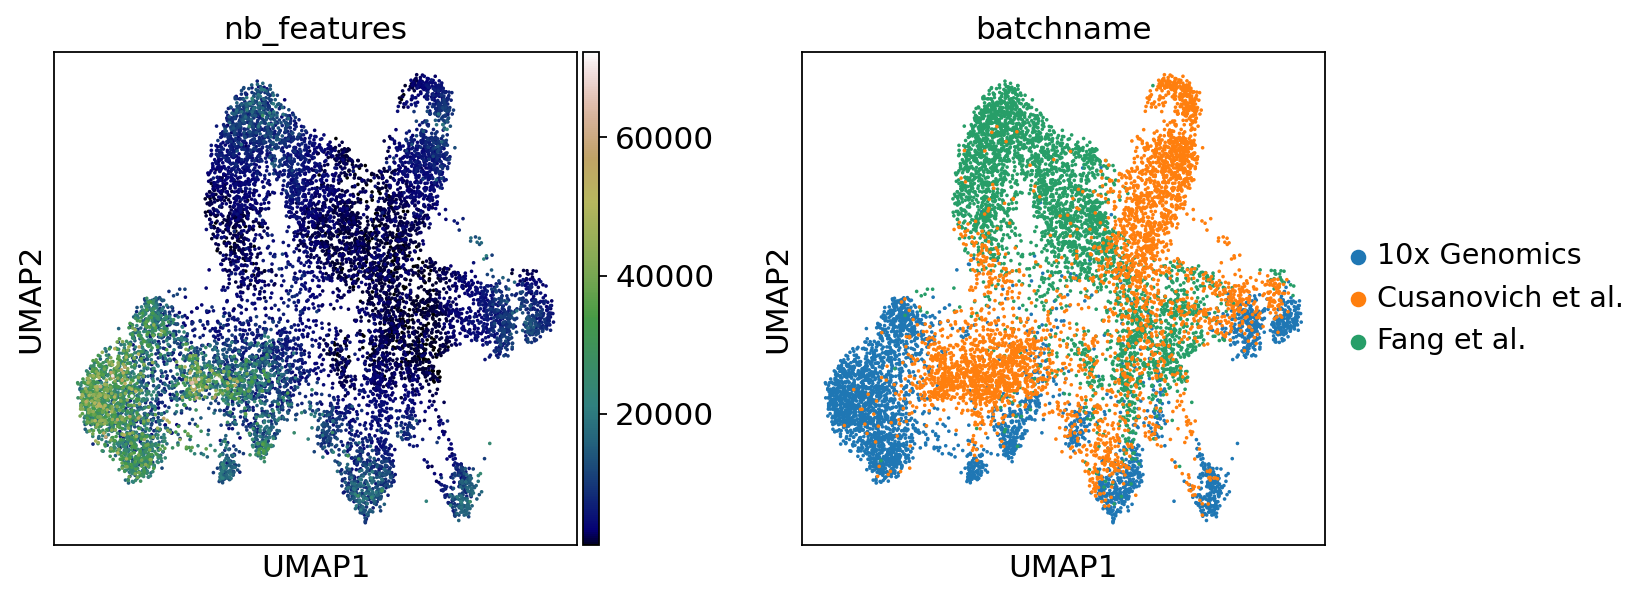

In [40]:
epi.pp.log1p(adatamerged)
epi.pp.lazy(adatamerged)
sc.pl.umap(adatamerged, color=['nb_features', 'batchname'], wspace=0.3)